In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
df = pd.read_csv("train.csv") ## Pre EDA
df = df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
len(df)

8523

C:\Users\nikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


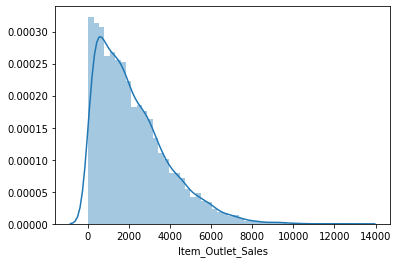

In [364]:
sns.distplot(df['Item_Outlet_Sales'])
df = df[df['Item_Outlet_Sales']<5000]

In [365]:
X = df.drop('Item_Outlet_Sales',axis=1).values
y = df['Item_Outlet_Sales'].values

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8522
Data columns (total 31 columns):
Item_Weight               7894 non-null float64
Item_Visibility           7894 non-null float64
Item_MRP                  7894 non-null float64
Item_Outlet_Sales         7894 non-null float64
Outlet_Years              7894 non-null int64
Item_Fat_Content_0        7894 non-null int64
Item_Fat_Content_1        7894 non-null int64
Outlet_Location_Type_0    7894 non-null int64
Outlet_Location_Type_1    7894 non-null int64
Outlet_Location_Type_2    7894 non-null int64
Outlet_Size_0             7894 non-null int64
Outlet_Size_1             7894 non-null int64
Outlet_Size_2             7894 non-null int64
Outlet_Size_3             7894 non-null int64
Outlet_Type_0             7894 non-null int64
Outlet_Type_1             7894 non-null int64
Outlet_Type_2             7894 non-null int64
Outlet_Type_3             7894 non-null int64
Item_Type_Combined_0      7894 non-null int64
Item_Type_C

In [367]:
## Split

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [370]:
## Scaling Data

In [371]:
from sklearn.preprocessing import MinMaxScaler

In [372]:
scaler = MinMaxScaler()

In [373]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((5920, 30), (1974, 30))

In [374]:
## Creating the model

In [375]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [376]:
X_train.shape

(5920, 30)

In [377]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [378]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [379]:
## Training

In [380]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=64,
          validation_data=(X_test, y_test), verbose=0,
          callbacks=[early_stop]
          )

Epoch 00069: early stopping


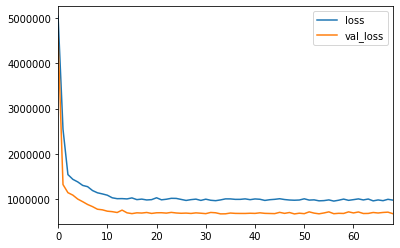

In [381]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [382]:
## Evaluation

In [383]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [384]:
predictions = model.predict(X_test)

In [385]:
np.sqrt(mean_squared_error(y_test,predictions))

828.2628710400064

In [386]:
df['Item_Outlet_Sales'].mean()

1858.4061952875675

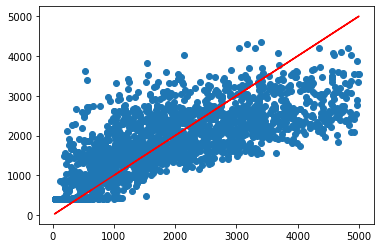

In [387]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')